## Introduction to Python Assigment A6:  Exploratory Data Analysis (EDA) of the Iris flower dataset.
### Jul 09, 2021

---

** Group Members: **

- **Name:** Humyra Chowdhury            
**Z#:** 23405864
          
- **Name:** Weiyi Huang                 
**Z#:**

- **Name:** Santiago Monsalve-Mejia     
**Z#:** 23502722    

---
                                         
 >**Description:** Expand and strengthen understanding of lists, tuples,  
 functions, dictionaries, and CSV file manipulation to perform       


First we import our ncessesary libraries and initialize the dictionaries where the summary statistics will be stored 


Summary statistics for  setosa
-------------------------------------------------------------------------------------
Attributes(cm)     Sepal Length    Sepal Width    Petal Length   Petal Width     
-------------------------------------------------------------------------------------
Min                   4.300          2.300          1.000          0.100
Max                   5.800          4.400          1.900          0.600
Mean                  5.006          3.418          1.464          0.244
St Dev                0.349          0.377          0.172          0.106


Summary statistics for  versicolor
-------------------------------------------------------------------------------------
Attributes(cm)     Sepal Length    Sepal Width    Petal Length   Petal Width     
-------------------------------------------------------------------------------------
Min                   4.900          2.000          3.000          1.000
Max                   7.000          3.400          5.100 

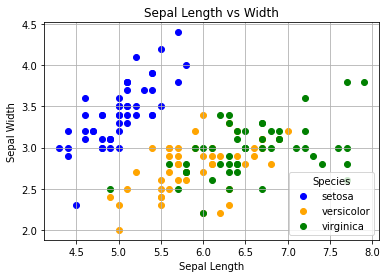

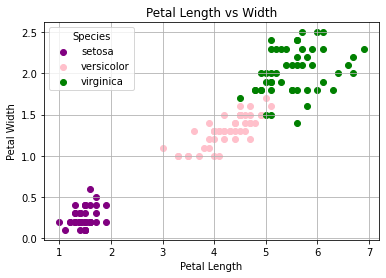

In [4]:
import csv
import math
import matplotlib.pyplot as plt


iris_summary = {
    "setosa" : {
        # "attribute_name" = [min, max, mean, stdev]
        "sepal_length": [], "sepal_width": [],
        "petal_length": [], "petal_width": [],
    },
    "versicolor" : {
        # "attribute_name" = [min, max, mean, stdev]
        "sepal_length": [], "sepal_width": [],
        "petal_length": [], "petal_width": [],
    },
    "virginica" : {
        # "attribute_name" = [min, max, mean, stdev]
        "sepal_length": [], "sepal_width": [],
        "petal_length": [], "petal_width": [],
    }
}



# calculate the mean
def calculate_avg(attribute_list):
    return sum(attribute_list)/len(attribute_list) # sum / (# of flowers)


# calculate standard deviation using the mean
def calculate_stdev(attribute_list, mean):
    var = sum((x - mean) ** 2 for x in attribute_list) / len(attribute_list) # calculate variance
    std_dev = math.sqrt(var)
    return std_dev


# gets the summary statistics for each of the four attributes for each species
# summary statistics include minimum, maximum, mean, and standard deviation
def summarystats(species_name, species):
    # print("species ", species)

    # for every attribute of a species, calculate summary stats
    for attribute in species:
        # print("attribute ", attribute)
        mini = min(species[attribute])
        maxi = max(species[attribute])
        avg = calculate_avg(species[attribute])
        stdev = calculate_stdev(species[attribute], avg)
        iris_summary[species_name][attribute] = [mini, maxi, avg, stdev] # store stats in the iris_summary nested dict

    print_summarystats(species_name, iris_summary[species_name])


# print 4x4 table containing the summary statistics for each attribute for one species 
def print_summarystats(species_name, species_summ):
    print()
    print("Summary statistics for ", species_name)
    # table header
    print("-"*85)
    print('{:19s}{:16s}{:15s}{:15s}{:16s}'.format("Attributes(cm)", "Sepal Length", "Sepal Width", "Petal Length", "Petal Width"))
    print("-"*85)

    labels = ["Min", "Max", "Mean", "St Dev"] # left-most column. labels = statistics that were calculated
    for index in range(len(labels)): # for every item in labels
        row = '{:12s}'.format(labels[index]) # get the appropriate statistic label
        for attribute in species_summ: # for every attribute of the species
            row += '{:15.3f}'.format(species_summ[attribute][index]) # get the appropriate statistic value
        print(row)
    print()


# print the sepal width vs sepal length and the petal width vs petal length scatter plots 
def print_scatterplots(iris):
    # scatter plot for sepal width vs sepal length
    ax = plt.subplot()
    color = ['blue', 'orange', 'green'] # used to set the color of the markers
    index = 0 # this will be used to traverse through the color list
    for species in iris: # for every species
        x = iris[species]["sepal_length"] # get the sepal lengths for the x-axis
        y = iris[species]["sepal_width"] # get the sepal widths for the y-axis
        ax.scatter(x, y, c=color[index], label=species)
        index += 1
    
    ax.legend(title = "Species")
    ax.grid()
    plt.title("Sepal Length vs Width")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.show()

    # scatter plot for petal width vs petal length
    ax = plt.subplot()
    color = ['purple', 'pink', 'green'] # used to set the color of the markers
    index = 0 # this will be used to traverse through the color list
    for species in iris: # for every species
        x = iris[species]["petal_length"] # get the petal lengths for the x-axis
        y = iris[species]["petal_width"] # get the petal widths for the y-axis
        ax.scatter(x, y, c=color[index], label=species)
        index += 1
    
    ax.legend(title = "Species")
    ax.grid()
    plt.title("Petal Length vs Width")
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.show()


###############################################################################################
######################################## MAIN FUNCTION ########################################
fields = []
# store the data for the four attributes for each species in a nested dictionary
iris = {
    "setosa" : {
        "sepal_length": [], "sepal_width": [],
        "petal_length": [], "petal_width": [],
    },
    "versicolor" : {
        "sepal_length": [], "sepal_width": [],
        "petal_length": [], "petal_width": [],
    },
    "virginica" : {
        "sepal_length": [], "sepal_width": [],
        "petal_length": [], "petal_width": [],
    }
}

with open("iris.csv", 'r') as csvfile:
    reader = csv.reader(csvfile) # create csv reader object
    fields = next(reader) # get field names from first row

    # get each data row one by one
    for row in reader:
        if row[4] == "setosa":
            iris["setosa"]["sepal_length"].append(float(row[0])) # get data from first col (sepal_length)
            iris["setosa"]["sepal_width"].append(float(row[1])) # get data from second col (sepal_width)
            iris["setosa"]["petal_length"].append(float(row[2])) # get data from third col (petal_length)
            iris["setosa"]["petal_width"].append(float(row[3])) # get data from fourth col (petal_width)
        elif row[4] == "versicolor":
            iris["versicolor"]["sepal_length"].append(float(row[0]))
            iris["versicolor"]["sepal_width"].append(float(row[1])) 
            iris["versicolor"]["petal_length"].append(float(row[2]))
            iris["versicolor"]["petal_width"].append(float(row[3])) 
        else:
            iris["virginica"]["sepal_length"].append(float(row[0])) 
            iris["virginica"]["sepal_width"].append(float(row[1]))
            iris["virginica"]["petal_length"].append(float(row[2])) 
            iris["virginica"]["petal_width"].append(float(row[3])) 

    summarystats("setosa", iris["setosa"])
    summarystats("versicolor", iris["versicolor"])
    summarystats("virginica", iris["virginica"])

    print_scatterplots(iris)